<a href="https://colab.research.google.com/github/dlwndms0812/Artificial_Intelligence/blob/main/homework5_2019110701.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall tensorflow
!pip install tensorflow==1.15

Found existing installation: tensorflow 2.7.0
Uninstalling tensorflow-2.7.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.7.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.7.0
     |████████████████████████████████| 412.3 MB 25 kB/s 
     |████████████████████████████████| 3.8 MB 37.7 MB/s 
     |████████████████████████████████| 503 kB 71.8 MB/s 
     |████████████████████████████████| 50 kB 6.5 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=784699f20228cc577fd9471bb4db993d7668623f2fb15be28c8a3de540e7c2a0
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("./mnist/data/", one_hot=True)


In [ ]:
learning_rate=0.01 #최적화 함수에서 사용할 학습률
trainning_epoch=20 #전체 데이터를 학습할 총횟수
batch_size=100 #미니배치로 한 번에 학습할 데이터
n_hidden=128 #은닉층의 뉴런 개수
n_input=28*28 #입력값의 크기

In [ ]:
X=tf.placeholder(tf.float32, [None, n_input])

#인코더
W_encode=tf.Variable(tf.random_normal([n_input, n_hidden])) #h_hidden개의 뉴런을 가진 은닉층
b_encode=tf.Variable(tf.random_normal([n_hidden]))
encoder=tf.nn.sigmoid(
    tf.add(tf.matmul(X, W_encode), b_encode))

In [ ]:
#디코더
W_decode=tf.Variable(tf.random.normal([n_hidden, n_input]))
b_decode=tf.Variable(tf.random.normal([n_input]))
decoder=tf.nn.sigmoid(
    tf.add(tf.matmul(encoder, W_decode), b_decode))

In [ ]:
cost=tf.reduce_mean(tf.pow(X-decoder,2))
optimizer=tf.train.AdamOptimizer(learning_rate).minimize(cost) #Adam

In [ ]:
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

total_batch=int(mnist.train.num_examples/batch_size)

for epoch in range(trainning_epoch):
  total_cost=0

  for i in range(total_batch):
    batch_xs, batch_ys=mnist.train.next_batch(batch_size)
    _, cost_val=sess.run([optimizer, cost],
                         feed_dict={X:batch_xs})
    total_cost+=cost_val
  print('Epoch:', '%04d' % (epoch+1),
        'Avg. cost =', '{:.4f}'.format(total_cost/total_batch))
print('최적화 완료')

Epoch: 0001 Avg. cost = 0.0591
Epoch: 0002 Avg. cost = 0.0300
Epoch: 0003 Avg. cost = 0.0238
Epoch: 0004 Avg. cost = 0.0205
Epoch: 0005 Avg. cost = 0.0183
Epoch: 0006 Avg. cost = 0.0163
Epoch: 0007 Avg. cost = 0.0151
Epoch: 0008 Avg. cost = 0.0143
Epoch: 0009 Avg. cost = 0.0136
Epoch: 0010 Avg. cost = 0.0130
Epoch: 0011 Avg. cost = 0.0124
Epoch: 0012 Avg. cost = 0.0120
Epoch: 0013 Avg. cost = 0.0116
Epoch: 0014 Avg. cost = 0.0115
Epoch: 0015 Avg. cost = 0.0113
Epoch: 0016 Avg. cost = 0.0112
Epoch: 0017 Avg. cost = 0.0111
Epoch: 0018 Avg. cost = 0.0107
Epoch: 0019 Avg. cost = 0.0106
Epoch: 0020 Avg. cost = 0.0105
최적화 완료


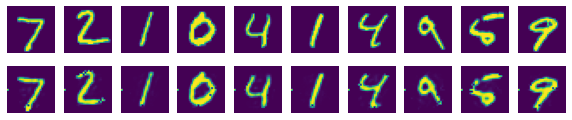

In [ ]:
sample_size=10

samples=sess.run(decoder,
                 feed_dict={X:mnist.test.images[:sample_size]})

fig, ax=plt.subplots(2, sample_size, figsize=(sample_size,2))

for i in range(sample_size):
  ax[0][i].set_axis_off()
  ax[1][i].set_axis_off()
  ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
  ax[1][i].imshow(np.reshape(samples[i], (28,28)))

plt.show()